# Does it seem like the students in the synchronous section prefer live lectures?

I think that both the student groups will prefer live lectures over the recorded ones. 

In [58]:
%reload_ext autoreload
%autoreload 2

First let's pull in the data from the survey that we took! 

In [59]:
DATA_DIRECTORY="../../data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/survey.csv"

from data_utils import read_csv_rows
table = read_csv_rows(DATA_FILE_PATH)

Let's convert the data to a column based table to make it easier to analyze. 

In [60]:
from data_utils import columnar

data_cols: dict[str, list[str]] = columnar(table)

There's a lot of columns there and we're only interested in two of them so .. let's narrow it down. 

In [61]:
from data_utils import select
column_interest: dict[str,list[str]] = select(data_cols, ["row_number", "section", "ls_effective"])

Let's print out a list of the columns so that we can make sure that our function worked. 

In [62]:
from data_utils import head 
from tabulate import tabulate

printing = head(column_interest, 5)
tabulate(printing, printing.keys(), "html")

row_number,section,ls_effective
0,Section 2 - 5:00pm - Async,3
1,Section 1 - 3:30pm - Sync + Async,5
2,Section 1 - 3:30pm - Sync + Async,5
3,Section 1 - 3:30pm - Sync + Async,6
4,Section 1 - 3:30pm - Sync + Async,4


Now, let's separate the synch responses from the asynch ones

In [63]:
synchr: list[dict[str,str]] = []
unsynchr: list[dict[str,str]] = []
for keys in table: 
    if keys["section"] == "Section 1 - 3:30pm - Sync + Async": 
        synchr.append(keys)
    elif keys["section"] == "Section 2 - 5:00pm - Async": 
        unsynchr.append(keys)

c_synch = columnar(synchr)
c_synch = select(c_synch, ["section", "ls_effective"])
printer = head(c_synch, 5)
tabulate(printer, printer.keys(), "html")

section,ls_effective
Section 1 - 3:30pm - Sync + Async,5
Section 1 - 3:30pm - Sync + Async,5
Section 1 - 3:30pm - Sync + Async,6
Section 1 - 3:30pm - Sync + Async,4
Section 1 - 3:30pm - Sync + Async,6


In [64]:
c_unsynch = columnar(unsynchr)
c_unsynch = select(c_unsynch, ["section", "ls_effective"])
printe = head(c_unsynch, 5)
tabulate(printe, printe.keys(), "html")

section,ls_effective
Section 2 - 5:00pm - Async,3
Section 2 - 5:00pm - Async,7
Section 2 - 5:00pm - Async,6
Section 2 - 5:00pm - Async,6
Section 2 - 5:00pm - Async,6


Now, let's collect the values in a separate list and print out a short sequence to ensure our function worked

In [65]:
synch: list[str] = []
i: int = 0
sync_values: list[str] = data_cols["section"]
effective_values: list[str] = data_cols["ls_effective"]

while i < len(sync_values):
    if sync_values[i] == "Section 1 - 3:30pm - Sync + Async":
        synch.append(effective_values[i])
    i += 1

print(synch[:8])

unsynch: list[str] = []
l: int = 0
unsync_values: list[str] = data_cols["section"]

while l < len(unsync_values):
    if unsync_values[l] == "Section 2 - 5:00pm - Async":
        unsynch.append(effective_values[l])
    l += 1

print(unsynch[:8])

['5', '5', '6', '4', '6', '5', '7', '5']
['3', '7', '6', '6', '6', '4', '6', '7']


Now that we have the values: lets convert them to integers and add them up 

In [66]:
values_int_synch: list[int] = []
values_int_unsynch: list[int] = []

for values in synch: 
    x = int(values)
    values_int_synch.append(x)

for value in unsynch: 
    x = int(value)
    values_int_unsynch.append(x)

sum_synch = 0
for values in values_int_synch: 
    sum_synch += values 

sum_unsynch = 0
for values in values_int_unsynch: 
    sum_unsynch += values 

print(sum_synch)
print(sum_unsynch)


2204
623


Now, let's find the average values for each class 

In [67]:
len_synch = len(synch)
len_unsynch = len(unsynch)

avg_synch = sum_synch / len_synch
avg_unsynch = sum_unsynch / len_unsynch

print(avg_unsynch)
print(avg_synch)

5.768518518518518
5.593908629441624


Since we have so many lines of data, let's double check our data: 

In [68]:
doublecheck: dict[str, list[str]] = select(data_cols, ["section"])

from data_utils import count

doublechecker = count(doublecheck["section"])

if doublechecker["Section 2 - 5:00pm - Async"] == len_unsynch: 
    print("True")
if doublechecker["Section 1 - 3:30pm - Sync + Async"] == len_synch: 
    print("True")

True
True


Let's plot our data 

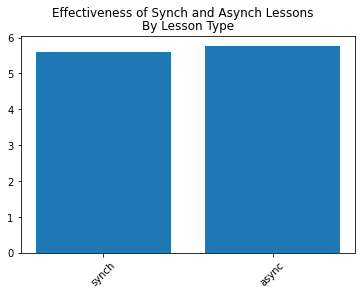

In [69]:
values: dict[str, int] = {}
values["synch"] = avg_synch
values["async"] = avg_unsynch

from matplotlib import pyplot as plt

# fig, axes = plt.subplots(1,2, figsize=(12, 5), sharey=True)

fig, ax = plt.subplots()
fig.suptitle("Effectiveness of Synch and Asynch Lessons")

ax.set_title("By Lesson Type")
ax.bar(values.keys(), values.values())
ax.tick_params(axis='x', labelrotation = 45)

We know that the averages are very similar but let's also look at the distirbution of the values 

In [70]:
def extra_function(h: list[str]) -> dict[int, int]: 
    result: dict[int, int] = {}
    for keys in h:
        keys_i = int(keys)
        if keys_i not in result: 
            result[keys_i] = 1 
        else: 
            result[keys_i] += 1
    return result 
    
synch_spread = extra_function(synch)
unsynch_spread = extra_function(unsynch)

Let's plot the distribution of the data

<BarContainer object of 6 artists>

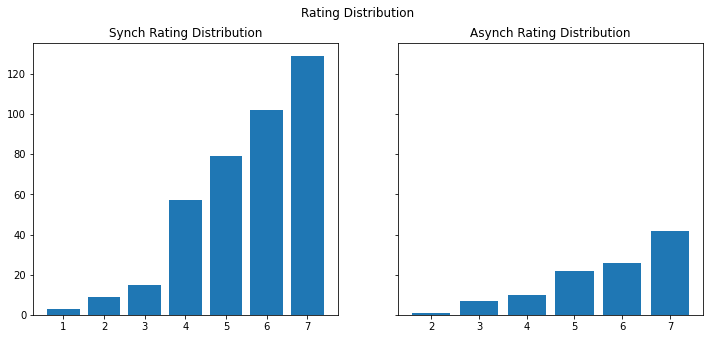

In [71]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(12, 5), sharey=True)
fig.suptitle("Rating Distribution")

axes[0].set_title("Synch Rating Distribution")
axes[0].bar(synch_spread.keys(), synch_spread.values())
axes[0].tick_params(axis='x', labelrotation = 0)

axes[1].set_title("Asynch Rating Distribution")
axes[1].bar(unsynch_spread.keys(), unsynch_spread.values())

# Conclusion: 

It appears that the conclusion that students in both sections will equally prefer live lectures appears to be correct from our data. The averages between the two groups are almost equal. In addition, the distirbution is heaviliy skewed towards the higher ratings for the live lectures. However, since the async group is much smaller than the sync group, the comparison may not be entirely fair. 
